In [12]:
from torch import nn
import numpy as np
import torch
from torch.distributions.normal import Normal
import torch.optim as optim
import torch.utils.data

zeros = torch.zeros(1, 129, 8)
zeros = zeros.unsqueeze(0)
print(zeros.size())
zeroPadding = nn.ZeroPad2d((0, 0, 4, 4))
x = zeroPadding(zeros)
print(x.size())
conv = nn.Conv1d(1, 18, kernel_size=(9,8), padding='valid', bias=False)
x = conv(x)
print(x.size())
relu = nn.ReLU()
x = relu(x)
print(x.size())
bn = nn.BatchNorm2d(num_features=18)
x = bn(x)
print(x.size())

torch.Size([1, 1, 129, 8])
torch.Size([1, 1, 137, 8])
torch.Size([1, 18, 129, 1])
torch.Size([1, 18, 129, 1])
torch.Size([1, 18, 129, 1])


Preprocessing Data

In [3]:
from preprocess import startProcessing

voicefolder = "H:/Projects/2022-2023/ConvDenoiser/dataset/voice/"
noisefolder = "H:/Projects/2022-2023/ConvDenoiser/dataset/ambience/"
exportfolder = "H:/Projects/2022-2023/ConvDenoiser/dataset/output/"
savepathy = ""

startProcessing(savepathy, voicefolder, noisefolder, exportfolder, 'All')

Number of cpu's :  8


100%|██████████| 442/442 [37:06<00:00,  5.04s/it]  



Enjoy your freshly processed files


Make and test model

In [1]:
from SPDenoiser import SPDenoiser, SPDataset
import torch
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader

learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = torch.nn.MSELoss()
device="cpu"
input = torch.zeros(60, 8)
input = input.unsqueeze(2)
input = input.unsqueeze(0)
print(input.size())

spdenoiser = SPDenoiser(60, 8, device)
spdenoiser.to(device)
spdataset = SPDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output/shortsp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output/shortcsp/")
sptestdataset = SPDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output/testsp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output/testcsp/")
spdataloader = DataLoader(spdataset, batch_size=64, shuffle=True)
sptestdataloader = DataLoader(sptestdataset, batch_size=64, shuffle=True)

optimizer=torch.optim.Adam(spdenoiser.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
lossy = 0
step = 0

for epoch in range(epochs):
    lossy = 0
    step = 0
    with tqdm(enumerate(spdataloader),desc=f"Training. Epoch: {epoch}. Loss for step {step}: {lossy}") as t:
        for steppy, (x_train,y_train) in t:
            step = steppy
            x_train.double().to(device)
            y_train.double().to(device)

            # print(x_train.size())

            output = spdenoiser(x_train)
            # print("Output: ", output.size())
            # print("Y train: ", y_train.size())

            loss= loss_fn(output,y_train)
            lossy += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # if step%300==0:

            #     with torch.no_grad():
            #         accuracy=0
            #         loss=0
            #         for stepTest, (x_test,y_test) in tqdm(enumerate(sptestdataloader),desc="Validation"):
            #             x_test.double().to(device)
            #             y_test.double().to(device)
                        
            #             output = spdenoiser(x_test)
            #             accuracy+=calc_accuracy(output,y_test)*100
            #             loss+= lossFunction(output,y_test).item()
            #             if stepTest>200:
            #                 break

            t.set_description(f"Training. Epoch: {epoch}. Average loss for step {step}: {lossy / step}")
    

# input = torch.zeros(60, 8)
# input = input.unsqueeze(2)
# input = input.unsqueeze(0)
# print(input.size())

Loading files to dataset: 100%|██████████| 7/7 [00:00<00:00, 250.68it/s]
Training. Epoch: 0. Loss for step 0: 0: 0it [00:00, ?it/s]

torch.Size([1, 60, 8, 1])
Directories:  H:/Projects/2022-2023/ConvDenoiser/dataset/output/shortsp/ | H:/Projects/2022-2023/ConvDenoiser/dataset/output/shortcsp/
Noisy file amount:  26
Clean file amount:  26
Directories:  H:/Projects/2022-2023/ConvDenoiser/dataset/output/testsp/ | H:/Projects/2022-2023/ConvDenoiser/dataset/output/testcsp/
Noisy file amount:  7
Clean file amount:  7


C:\Users\woute\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\conv.py:453: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:883.)
  return F.conv2d(input, weight, bias, self.stride,
Training. Epoch: 0. Average loss for step 443: 0.00683222059160471: : 444it [00:38, 11.43it/s]  
Training. Epoch: 1. Average loss for step 443: 0.001244064886122942: : 444it [00:38, 11.59it/s] 
Training. Epoch: 2. Average loss for step 443: 0.0011378256604075432: : 444it [00:38, 11.48it/s]
Training. Epoch: 3. Average loss for step 443: 0.001027627382427454: : 444it [00:37, 11.72it/s] 
Training. Epoch: 4. Average loss for step 443: 0.000981884659267962: : 444it [00:38, 11.68it/s] 


Testfile shape:  (1409, 60)
[]


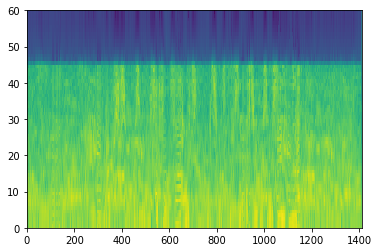

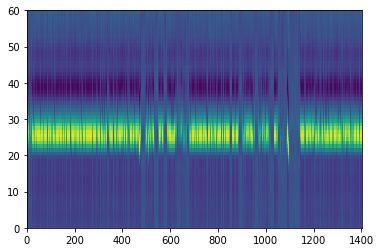

[[-0.23002326 -0.25052908 -0.27003765 ...  0.03392381  0.0547275
   0.08097873]
 [-0.26938337 -0.28612944 -0.30558291 ... -0.08585829 -0.05731431
  -0.03143787]
 [-0.26938337 -0.28612944 -0.30558291 ... -0.08585829 -0.05731431
  -0.03143787]
 ...
 [-0.14725628 -0.15426737 -0.16371459 ... -0.11480911 -0.08209607
  -0.05810607]
 [-0.19757032 -0.21373309 -0.24082802 ... -0.10320636 -0.07441868
  -0.04762614]
 [-0.14165603 -0.15398003 -0.17159092 ... -0.01487533  0.00570293
   0.03163964]]
[[-0.04222    -0.04312913 -0.04318965 ... -0.19092418 -0.19064818
  -0.19142148]
 [-0.03444707 -0.03493042 -0.0350133  ... -0.24327755 -0.24505927
  -0.24432619]
 [-0.03959164 -0.03986474 -0.04222595 ... -0.24812914 -0.24912317
  -0.24844213]
 ...
 [-0.02356586 -0.02478709 -0.02448688 ... -0.24378705 -0.24506702
  -0.2446338 ]
 [-0.02824177 -0.02923001 -0.02905531 ... -0.24378346 -0.24500844
  -0.2448555 ]
 [-0.04720538 -0.04783256 -0.04930171 ... -0.1883221  -0.18803866
  -0.18876486]]


In [3]:
import matplotlib.pyplot as plt

testfile = np.load("H:/Projects/2022-2023/ConvDenoiser/dataset/output/shortsp/common_voice_en_34919143.mp3_sp.npy").astype(np.float32)
print('Testfile shape: ', np.shape(testfile))
testfile = torch.nn.functional.normalize(torch.from_numpy(testfile))
testfile = testfile.cpu().detach().numpy()
testsamples = []
i = 0
while i < len(testfile) - 8:
    testsamples.append(testfile[i:i+8])
    i += 1

cleanfile = np.zeros((0,60))
print(cleanfile)
for sample in testsamples:
    sample = torch.nn.functional.normalize(torch.from_numpy(sample).transpose(0,1).unsqueeze(0).unsqueeze(0))
    output = spdenoiser(sample)
    # print(output.size())
    output = output.squeeze(0).squeeze(0).transpose(0,1).cpu().detach().numpy()
    # print('Output size: ', np.shape(output))
    cleanfile = np.concatenate((cleanfile, output), axis=0)
    # print('Cleanfile shape: ', np.shape(cleanfile))



# newinput = torch.squeeze(noisy, dim=0)
# print(newinput.size())

plt.pcolormesh(np.rot90(testfile, 3))
plt.show()

plt.pcolormesh(np.rot90(cleanfile, 3))
plt.show()

print(cleanfile)
print(testfile)

In [24]:
torch.nn.functional.normalize(torch.from_numpy(cleanfile), p=1.0)

tensor([[-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], dtype=torch.float64)

In [2]:
import torch
input = torch.zeros(60, 8)
print(input[-1:].size())

torch.Size([1, 8])


c:\Users\woute\.conda\envs\Diffwave\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
